In [228]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [230]:
# Generate Data
num_days = 365
platforms = ['Instagram Ads', 'Pinterest Ads', 'Snapchat Ads', 'TikTok Ads', 'YouTube Ads']
data = {
    'Ad_ID': np.arange(1, num_days + 1),
    'Platform': [random.choice(platforms) for _ in range(num_days)],
    'Impressions': np.random.randint(1000, 100000, size=num_days),
    'Clicks': np.random.randint(50, 10000, size=num_days),
    'Conversions': np.random.randint(1, 1000, size=num_days),
    'Ad_Spend': np.round(np.random.uniform(10, 1000, size=num_days), 2),
    'Revenue': np.round(np.random.uniform(50, 5000, size=num_days), 2),
    'Date': [(datetime.today() - timedelta(days=num_days - i)).strftime('%Y-%m-%d') for i in range(num_days)]
}

# Create DataFrame
df = pd.DataFrame(data)

columns_to_print = ['Ad_ID', 'Platform', 'Impressions', 'Clicks', 'Conversions', 'Ad_Spend', 'Revenue', 'Date']

print(df[columns_to_print])

     Ad_ID       Platform  Impressions  Clicks  Conversions  Ad_Spend  \
0        1   Snapchat Ads        12698    6378          461    104.22   
1        2     TikTok Ads        32576    9985          340    747.91   
2        3   Snapchat Ads        90518    7860          149    545.97   
3        4    YouTube Ads        57584    1802          935    177.66   
4        5  Instagram Ads        70792    5931          778    738.63   
..     ...            ...          ...     ...          ...       ...   
360    361     TikTok Ads        32054    1502          598    332.74   
361    362  Pinterest Ads        36333    5375          705    969.91   
362    363  Instagram Ads        20751    2350           56    206.03   
363    364  Instagram Ads        62592    9708           99    486.49   
364    365     TikTok Ads        81893    3330          994     71.72   

     Revenue        Date  
0    4858.50  2023-07-30  
1     632.31  2023-07-31  
2    3731.87  2023-08-01  
3    4925.25  2

In [232]:
# Calculate key metrics
df['CTR'] = df['Clicks'] / df['Impressions']
df['CVR'] = df['Conversions'] / df['Clicks']
df['ROI'] = df['Revenue'] / df['Ad_Spend']

selected_columns = ['CTR', 'CVR', 'ROI']
print(df[selected_columns])

          CTR       CVR        ROI
0    0.502284  0.072280  46.617732
1    0.306514  0.034051   0.845436
2    0.086834  0.018957   6.835302
3    0.031293  0.518868  27.722898
4    0.083781  0.131175   2.443727
..        ...       ...        ...
360  0.046858  0.398136   2.628449
361  0.147937  0.131163   3.144725
362  0.113248  0.023830   8.439208
363  0.155100  0.010198   5.966125
364  0.040663  0.298498  48.960959

[365 rows x 3 columns]


In [226]:
# Save to Excel
df.to_excel(r'C:\Users\DELL\Desktop\FashionElite_Ad_Campaign_Data.xlsx', index=False)

In [199]:
# # Group by platform and calculate average revenue, ad spend, CTR, and CVR
# platform_grouped = df.groupby('Platform')[['Revenue', 'Ad_Spend', 'CTR', 'CVR']].mean()

# # Calculate ROI
# platform_grouped['ROI'] = platform_grouped['Revenue'] / platform_grouped['Ad_Spend']

# # Check if required columns exist
# required_columns = ['CTR', 'CVR', 'ROI', 'Ad_Spend']
# for col in required_columns:
#     assert col in platform_grouped.columns, f"Column '{col}' does not exist in platform_grouped"

In [238]:
# Group by platform and calculate average revenue, ad spend, CTR, and CVR
platform_grouped = df.groupby('Platform')[['Revenue', 'Ad_Spend', 'CTR', 'CVR']].mean()

# Calculate ROI
platform_grouped['ROI'] = platform_grouped['Revenue'] / platform_grouped['Ad_Spend']

# Check if required columns exist
required_columns = ['CTR', 'CVR', 'ROI', 'Ad_Spend']
for col in required_columns:
    assert col in platform_grouped.columns, f"Column '{col}' does not exist in platform_grouped"


print("Platform Grouped Data:")
print(platform_grouped)

# Print Revenue data
print("\nAverage Revenue by Platform:")
print(platform_grouped['Revenue'])

# Print Ad Spend data
print("\nAverage Ad Spend by Platform:")
print(platform_grouped['Ad_Spend'])

# Print CTR data
print("\nAverage CTR by Platform:")
print(platform_grouped['CTR'])

# Print CVR data
print("\nAverage CVR by Platform:")
print(platform_grouped['CVR'])

# Print ROI data
print("\nROI by Platform:")
print(platform_grouped['ROI'])

Platform Grouped Data:
                   Revenue    Ad_Spend       CTR       CVR       ROI
Platform                                                            
Instagram Ads  2688.194211  524.661316  0.444857  0.237478  5.123675
Pinterest Ads  2556.883284  491.877463  0.185192  0.216760  5.198212
Snapchat Ads   2665.921852  499.997654  0.151802  0.394129  5.331869
TikTok Ads     2650.208429  536.081286  0.377218  0.218288  4.943669
YouTube Ads    2539.968310  479.381690  0.218323  0.208798  5.298426

Average Revenue by Platform:
Platform
Instagram Ads    2688.194211
Pinterest Ads    2556.883284
Snapchat Ads     2665.921852
TikTok Ads       2650.208429
YouTube Ads      2539.968310
Name: Revenue, dtype: float64

Average Ad Spend by Platform:
Platform
Instagram Ads    524.661316
Pinterest Ads    491.877463
Snapchat Ads     499.997654
TikTok Ads       536.081286
YouTube Ads      479.381690
Name: Ad_Spend, dtype: float64

Average CTR by Platform:
Platform
Instagram Ads    0.444857
Pinteres

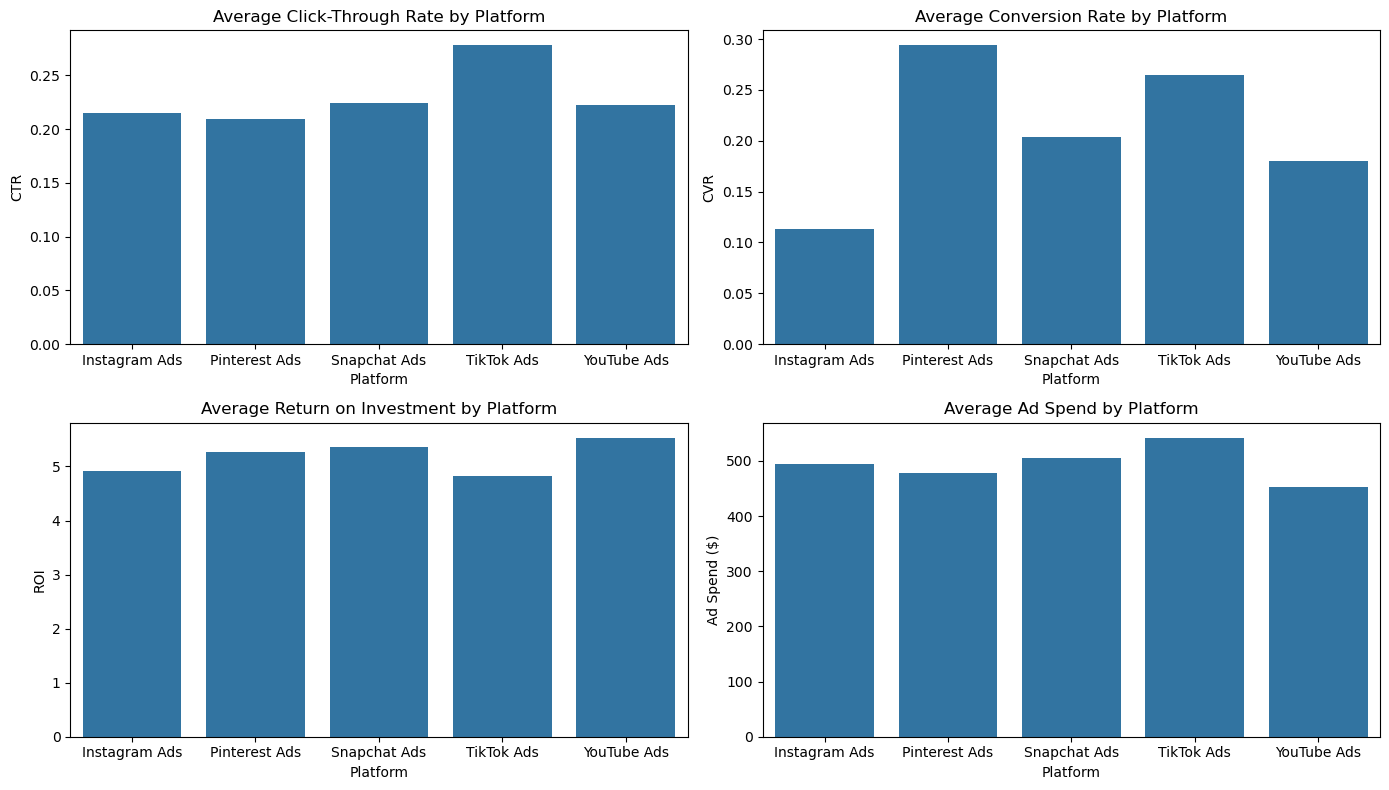

In [201]:
# Create visualizations
plt.figure(figsize=(14, 8))

# Click-through Rate
plt.subplot(2, 2, 1)
sns.barplot(x=platform_grouped.index, y=platform_grouped['CTR'])
plt.title('Average Click-Through Rate by Platform')
plt.ylabel('CTR')

# Conversion Rate
if 'CVR' in platform_grouped.columns:
    plt.subplot(2, 2, 2)
    sns.barplot(x=platform_grouped.index, y=platform_grouped['CVR'])
    plt.title('Average Conversion Rate by Platform')
    plt.ylabel('CVR')
else:
    print("Error: 'CVR' column does not exist in the DataFrame.")

# Plot the average ROI by platform
plt.subplot(2, 2, 3)
sns.barplot(x=platform_grouped.index, y=platform_grouped['ROI'])
plt.title('Average Return on Investment by Platform')
plt.ylabel('ROI')

# Ad Spend
plt.subplot(2, 2, 4)
sns.barplot(x=platform_grouped.index, y=platform_grouped['Ad_Spend'])
plt.title('Average Ad Spend by Platform')
plt.ylabel('Ad Spend ($)')

plt.tight_layout()
plt.savefig(r'C:\Users\DELL\Desktop\FashionElite_Ad_Campaign_Visualizations.png')
plt.show()

In [220]:
from fpdf import FPDF
from IPython.display import IFrame

class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Comparative Report of FashionElite Ad Campaign', 0, 1, 'C')

    def chapter_title(self, title):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, title, 0, 1, 'L')
        self.ln(2)

    def chapter_body(self, body):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, body)
        self.ln()

    def add_image(self, path, x, y, w, h):
        self.image(path, x, y, w, h)

# Create the PDF file
pdf = PDF()

pdf.add_page()
pdf.chapter_title('Recommendations for Future Campaigns')
pdf.chapter_body(recommendations)

pdf.add_page()
pdf.chapter_title('Performance Metrics by Platform')
pdf.chapter_body(platform_grouped.to_string())

pdf.add_page()
pdf.chapter_title('Visualizations')
pdf.add_image(r'C:\Users\DELL\Desktop\FashionElite_Ad_Campaign_Visualizations.png', 10, 30, 190, 160)

pdf.add_page()
pdf.chapter_title('Recommendations for Future Campaigns')
pdf.chapter_body(recommendations)

pdf.output(r'C:\Users\DELL\Desktop\FashionElite_Ad_Campaign_Report.pdf')

# Display the PDF file in Jupyter Notebook
IFrame(src='file:///C:/Users/DELL/Desktop/FashionElite_Ad_Campaign_Report.pdf', width=1000, height=500)